# **Análise de dados da economia mineral brasileira** 

Gabriel Alves Coelho

------------------

# Introdução
---------------
Neste projeto é realizada a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre a economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral").

Mais especificamente, são analisados os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).
O CFEM é um imposto pago pelas empresas ou pessoas físicas à União, aos Estados, Distrito Federal e Município pela utilização econômica dos recursos minerais.

Tarefa 0 - Leitura dos dados
---------

Na célula abaixo é implementada uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também é criado um dicionário <code>reg</code> pra facilitar o acesso aos registros.



In [ ]:
!wget https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv

def le_dados(filename):

    file = open(filename, 'r', encoding='ISO-8859-1')
    dados = []

    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    rotulos = dados.pop(0)
    
    return rotulos, dados

rotulos, dados = le_dados("Cfem.csv")

print (rotulos, '\n')
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))

index = 0
reg = {}
for d in rotulos:
  reg[d] = index
  index=index+1

print(reg)

Tarefa 1 - Evolução da arrecadação ao longo dos anos
---------

Função para gerar um gráfico de arrecadação do CFEM no Estado de Minas Gerais ao longo dos anos (2003 a 2021 em milhões de reais).



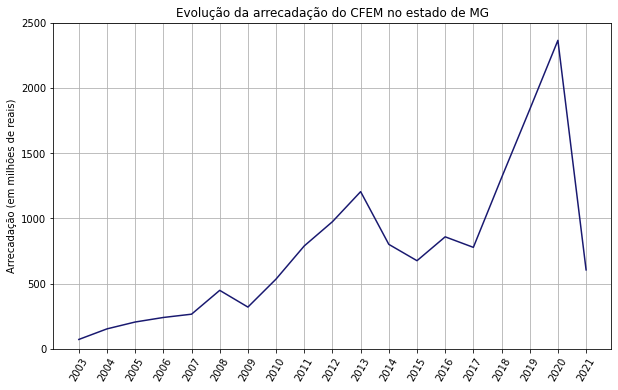

In [ ]:
#Função 1

def arrecadacao_mg():
    rotulos, dados = le_dados("Cfem.csv")
    cfem_dict = dict()
    cfem_list = list()

    for linha in dados:
        if linha[9] == "MG":
            if linha[0] not in cfem_dict:
                cfem_dict[linha[0]] = float(linha[13].replace(",", "."))
            else:
                cfem_dict[linha[0]] += float(linha[13].replace(",", "."))

    for v in cfem_dict.values():
        cfem_list.append(v)

    return cfem_list

#Gráfico 1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ano = 2003
x = list()
while ano <= 2021:
    x.append(str(ano))
    ano += 1

arrecadado = arrecadacao_mg()
for i in range(len(arrecadado)):
    arrecadado[i] = arrecadado[i]/10**6

plt.plot(x, arrecadado, color = 'midnightblue')
plt.xticks(rotation=60)
plt.ylim(0, 2500)

plt.ylabel('Arrecadação (em milhões de reais)')
plt.title('Evolução da arrecadação do CFEM no estado de MG')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.grid()
plt.show()


Tarefa 2 - Extração de bauxita por estado entre 2015 e 2020
---------

Código capaz de plotar um gráfico de barras que mostra a extração de bauxita por estado brasileiro entre os anos de 2015 e 2020. 

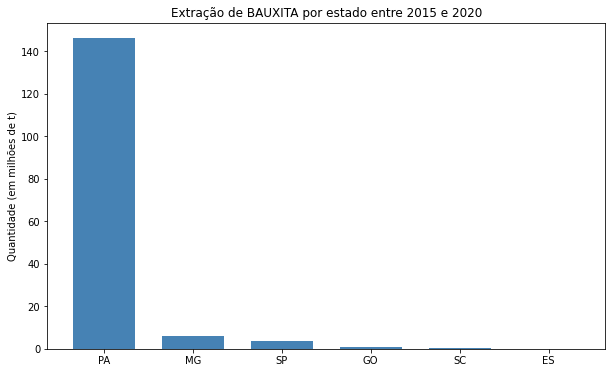

In [ ]:
#Função 2 

def extracao_bauxita():
    rotulos, dados = le_dados("Cfem.csv")
    extracao_dict = dict()
    extracao_list = list()
    estados = list()

    for linha in dados:
        if linha[8] == "BAUXITA" and float(linha[0]) >= 2015 and float(linha[0]) <= 2020:
            if linha[9] not in extracao_dict:
                extracao_dict[linha[9]] = float(linha[12].replace(",", "."))
            else:
                extracao_dict[linha[9]] += float(linha[12].replace(",", "."))

    tmp = list()
    for k, v in extracao_dict.items():
        tmp.append((v, k))
    tmp.sort(reverse=True)

    for v, k in tmp:
        estados.append(k)
        extracao_list.append(v)

    return extracao_list, estados

#Gráfico 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

extraido, est = extracao_bauxita()
for i in range(len(extraido)):
    extraido[i] = extraido[i]/10**6

plt.bar(range(len(extraido)), extraido, width=0.7, color='steelblue')
plt.ylabel('Quantidade (em milhões de t)')

plt.title('Extração de BAUXITA por estado entre 2015 e 2020')
plt.xticks(np.arange(0, len(est)), est)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


Tarefa 3 - Extração de ouro por estado nos últimos dez anos.
---------

Códigos para gerar um gráfico de barras que mostra a extração de ouro (**'OURO'**) por estado nos últimos dez anos completos (de 2010 até 2020) na célula abaixo.

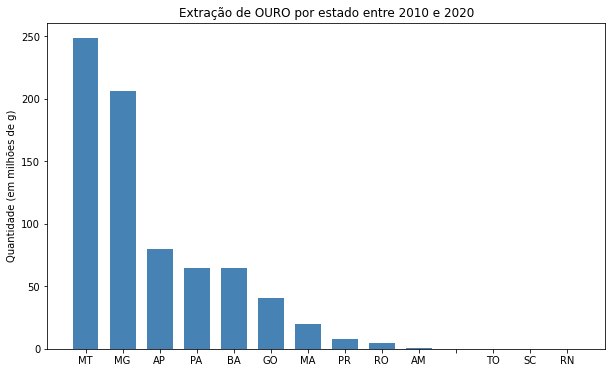

In [ ]:
#Função 3 

def extracao_ouro():
    rotulos, dados = le_dados("Cfem.csv")
    extracao_dict = dict()
    extracao_list = list()
    estados = list()

    for linha in dados:
        if linha[8] == "OURO" and float(linha[0]) >= 2010 and float(linha[0]) <= 2020:
            if linha[9] not in extracao_dict and linha[12] != "":
                extracao_dict[linha[9]] = float(linha[12].replace(",", "."))
            elif linha[9] in extracao_dict and linha[12] != "":
                extracao_dict[linha[9]] += float(linha[12].replace(",", "."))

    tmp = list()
    for k, v in extracao_dict.items():
        tmp.append((v, k))
    tmp.sort(reverse=True)

    for v, k in tmp:
        estados.append(k)
        extracao_list.append(v)
    
    return extracao_list, estados

#Gráfico 3

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

extraido, est = extracao_ouro()
for i in range(len(extraido)):
    extraido[i] = extraido[i]/10**6

plt.bar(range(len(extraido)), extraido, width=0.7, color='steelblue')
plt.ylabel('Quantidade (em milhões de g)')

plt.title('Extração de OURO por estado entre 2010 e 2020')
plt.xticks(np.arange(0, len(est)), est)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


Tarefa 4 - Evolução da extração de FERRO em Minas Gerais e Pará.
---------

Códigos para plotar um gráfico que mostra a evolução da extração de ferro (**'FERRO'**) nos estados de Minas Gerais e Pará (de 1991 até 2019).

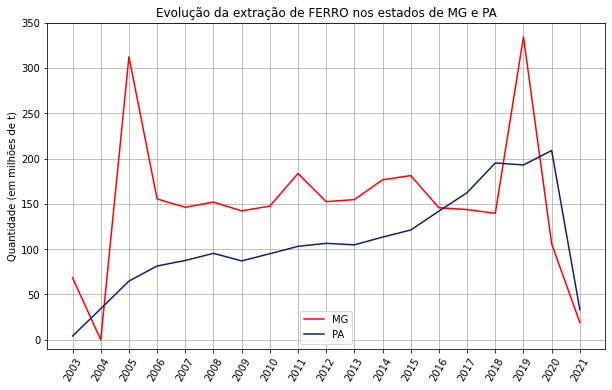

In [ ]:
#Função 4

def extracao_ferro():
    rotulos, dados = le_dados("Cfem.csv")
    eMG_dict = dict()
    eMG_list = list()
    ePA_dict = dict()
    ePA_list = list()

    for linha in dados:
        if linha[8] == "FERRO":
            if linha[9] == "MG":
                if linha[0] not in eMG_dict and linha[12] != "":
                    eMG_dict[linha[0]] = float(linha[12].replace(",", "."))
                elif linha[0] in eMG_dict and linha[12] != "":
                    eMG_dict[linha[0]] += float(linha[12].replace(",", "."))
            elif linha[9] == "PA":
                if linha[0] not in ePA_dict and linha[12] != "":
                    ePA_dict[linha[0]] = float(linha[12].replace(",", "."))
                elif linha[0] in eMG_dict and linha[12] != "":
                    ePA_dict[linha[0]] += float(linha[12].replace(",", "."))

    for v in eMG_dict.values():
        eMG_list.append(v)

    for v in ePA_dict.values():
        ePA_list.append(v)

    return eMG_list, ePA_list

#Gráfico 4

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ano = 2003
x = list()
while ano <= 2021:
    x.append(str(ano))
    ano += 1

eMG, ePA = extracao_ferro()
for i in range(len(eMG)):
    eMG[i] = eMG[i]/10**6
for i in range(len(ePA)):
    ePA[i] = ePA[i]/10**6

plt.plot(x, eMG, color = 'r')
plt.plot(x, ePA, color = 'midnightblue')
plt.xticks(rotation=60)
plt.ylim(-10, 350)

plt.ylabel('Quantidade (em milhões de t)')
plt.title('Evolução da extração de FERRO nos estados de MG e PA')
plt.legend(['MG', 'PA'], loc='lower center')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.grid()
plt.show()


Tarefa 5 - Percentual de arrecadação dos estados da Região Sul no ano de 2019 por tipo de minério extraído.
---------

Código para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído pelos estados da Região Sul no ano de 2019. Utilize o mesmo código para plotar o mesmo gráfico para o Estado de Minas Gerais.


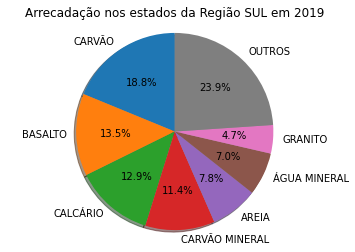

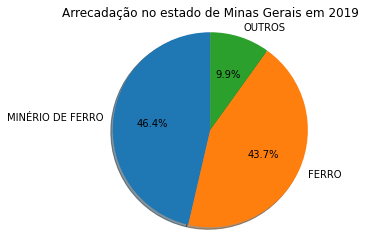

In [ ]:
#Função 5.1

def percentuais_rs():
    rotulos, dados = le_dados("Cfem.csv")
    cfem_dict = dict()
    cfem_list = list()
    minerios = list()

    for linha in dados:
        if linha[0] == "2019":
            if linha[9] == "PR" or linha[9] == "SC" or linha[9] == "RS":
                if linha[8] not in cfem_dict:
                    cfem_dict[linha[8]] = float(linha[13].replace(",", "."))
                else:
                    cfem_dict[linha[8]] += float(linha[13].replace(",", "."))

    tmp = list()
    for k, v in cfem_dict.items():
        tmp.append((v, k))
    tmp.sort(reverse=True)

    for v, k in tmp:
        minerios.append(k)
        cfem_list.append(v)

    percent = list()
    labels = list()
    outros = 0
    for i in range(len(cfem_list)):
        if cfem_list[i]/sum(cfem_list) > 0.03:
            percent.append((cfem_list[i]/sum(cfem_list)) * 100)
            labels.append(minerios[i])
        else:
            outros += (cfem_list[i]/sum(cfem_list)) * 100
    labels.append("OUTROS")
    percent.append(outros)

    return percent, labels

#Função 5.2

def percentuais_mg():
    rotulos, dados = le_dados("Cfem.csv")
    cfem_dict = dict()
    cfem_list = list()
    minerios = list()

    for linha in dados:
        if linha[0] == "2019":
            if linha[9] == "MG":
                if linha[8] not in cfem_dict:
                    cfem_dict[linha[8]] = float(linha[13].replace(",", "."))
                else:
                    cfem_dict[linha[8]] += float(linha[13].replace(",", "."))

    tmp = list()
    for k, v in cfem_dict.items():
        tmp.append((v, k))
    tmp.sort(reverse=True)

    for v, k in tmp:
        minerios.append(k)
        cfem_list.append(v)

    percent = list()
    labels = list()
    outros = 0
    for i in range(len(cfem_list)):
        if cfem_list[i]/sum(cfem_list) > 0.05:
            percent.append((cfem_list[i]/sum(cfem_list)) * 100)
            labels.append(minerios[i])
        else:
            outros += (cfem_list[i]/sum(cfem_list)) * 100
    labels.append("OUTROS")
    percent.append(outros)

    return percent, labels

#Gráfico 5.1

sizes, labels = percentuais_rs()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Arrecadação nos estados da Região SUL em 2019')
plt.show()

#Gráfico 5.2

print("\n")
sizes, labels = percentuais_mg()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Arrecadação no estado de Minas Gerais em 2019')
plt.show()
